In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import functools
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt



In [0]:
!ls

sample_data


In [0]:
filepath = "sample_data/Dataset_Subsystem_2.csv"
data = pd.read_csv(filepath)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62219 entries, 0 to 62218
Data columns (total 84 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  62219 non-null  int64 
 1   frame               62219 non-null  int64 
 2   camera_facing_side  62219 non-null  object
 3   gesture             62219 non-null  object
 4   palm_root_x         62219 non-null  int64 
 5   palm_root_y         62219 non-null  int64 
 6   palm_thumb_1_x      62219 non-null  int64 
 7   palm_thumb_1_y      62219 non-null  int64 
 8   palm_thumb_2_x      62219 non-null  int64 
 9   palm_thumb_2_y      62219 non-null  int64 
 10  palm_thumb_3_x      62219 non-null  int64 
 11  palm_thumb_3_y      62219 non-null  int64 
 12  palm_index_1_x      62219 non-null  int64 
 13  palm_index_1_y      62219 non-null  int64 
 14  palm_index_2_x      62219 non-null  int64 
 15  palm_index_2_y      62219 non-null  int64 
 16  palm_index_3_x      62

In [0]:
X = data.loc[:,"palm_root_x":"dorsal_pinky_4_y"]
Y = data.loc[:,"camera_facing_side":"gesture"]
Y.head(2)

,camera_facing_side,gesture
0,open,palm
1,open,palm


In [0]:
Y['label'] = Y['camera_facing_side'].map(str) + Y["gesture"].map(str)
Y = Y.drop(columns = ['camera_facing_side','gesture'])
Y.head(2)

,label
0,openpalm
1,openpalm


In [0]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
Y = Y.reshape(-1,1)
Y.shape
enc = OneHotEncoder()
enc.fit(Y)
Y = enc.transform(Y).toarray()



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:

Y[2]

array([0., 0., 0., 1., 0., 0.])

In [0]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, Y, test_size=0.33, random_state=42)

In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41686 entries, 14563 to 56422
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   palm_root_x        41686 non-null  int64
 1   palm_root_y        41686 non-null  int64
 2   palm_thumb_1_x     41686 non-null  int64
 3   palm_thumb_1_y     41686 non-null  int64
 4   palm_thumb_2_x     41686 non-null  int64
 5   palm_thumb_2_y     41686 non-null  int64
 6   palm_thumb_3_x     41686 non-null  int64
 7   palm_thumb_3_y     41686 non-null  int64
 8   palm_index_1_x     41686 non-null  int64
 9   palm_index_1_y     41686 non-null  int64
 10  palm_index_2_x     41686 non-null  int64
 11  palm_index_2_y     41686 non-null  int64
 12  palm_index_3_x     41686 non-null  int64
 13  palm_index_3_y     41686 non-null  int64
 14  palm_index_4_x     41686 non-null  int64
 15  palm_index_4_y     41686 non-null  int64
 16  palm_middle_1_x    41686 non-null  int64
 17  palm_mid

In [37]:
model = Sequential()
model.add(Input(shape=(80,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.build()
print(model.summary())
adam = Adam(lr=0.01)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)
print(History)
val_loss, val_acc = model.evaluate(X_test, y_test)
model.save("Sub2-weights.hdf5")

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               8100      
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 606       
Total params: 8,706
Trainable params: 8,706
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
522/522 [==============================] - 1s 2ms/step - loss: 1.0878 - accuracy: 0.9939 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
522/522 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
522/522 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
522/522 [==============================] - 1s 2ms/st

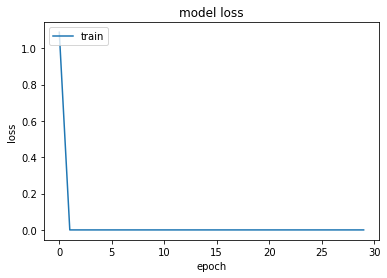

In [43]:

# "Loss"
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
enc.categories_

[array([0, 1, 2, 3, 4, 5])]

In [23]:
label_encoder.classes_

array(['fistdorsal', 'fistpalm', 'opendorsal', 'openpalm',
       'three_fingersdorsal', 'three_fingerspalm'], dtype=object)